# The Lorenz System

#### System Equations:

$\frac{\mathrm{d} x}{\mathrm{d} t} = \sigma (y-x)$

$\frac{\mathrm{d} y}{\mathrm{d} t} = x (\rho -z)-y,$

$\frac{\mathrm{d} z}{\mathrm{d} t} = xy - \beta z$

The Lorenz system is a continuous 3-dimensional system.
For details, visit https://en.wikipedia.org/wiki/Lorenz_system

In [63]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3D plot

In [64]:
#System Parameters: for chaotic
sigma = 10
rho = 28
beta = 8/3

In [65]:
#initial conditions
x0, y0, z0 = np.random.rand(3) 

#### Plotting phase plane

In [66]:
iterations = 50000 #iterations
time_step = 0.05 #time step of integration

In [67]:
#for dx/dt
def f1(x,y,z,t):
    return sigma*(y-x)

In [68]:
#for dy/dt
def f2(x,y,z,t):
    return x*(rho-z)-y

In [69]:
#for dz/dt
def f3(x,y,z,t):
    return x*y-beta*z

We use what is called as the Runge-Kutta method to integrate the system.

In [70]:
def rk4(x0,y0,z0,N,h): 
    
    t = np.zeros(N)
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    
    x[0] = x0
    y[0] = y0
    z[0] = z0
    
    for i in range(1,N):
        
        k1=f1(x[i-1],y[i-1],z[i-1],t[i-1])
        l1=f2(x[i-1],y[i-1],z[i-1],t[i-1])
        m1=f3(x[i-1],y[i-1],z[i-1],t[i-1])
        
        k2=f1(x[i-1]+0.5*h*k1,y[i-1]+0.5*h*l1,z[i-1]+0.5*h*m1,t[i-1])
        l2=f2(x[i-1]+0.5*h*k1,y[i-1]+0.5*h*l1,z[i-1]+0.5*h*m1,t[i-1])
        m2=f3(x[i-1]+0.5*h*k1,y[i-1]+0.5*h*l1,z[i-1]+0.5*h*m1,t[i-1])
        
        k3=f1(x[i-1]+0.5*h*k2,y[i-1]+0.5*h*l2,z[i-1]+0.5*h*m2,t[i-1])
        l3=f2(x[i-1]+0.5*h*k2,y[i-1]+0.5*h*l2,z[i-1]+0.5*h*m2,t[i-1])
        m3=f3(x[i-1]+0.5*h*k2,y[i-1]+0.5*h*l2,z[i-1]+0.5*h*m2,t[i-1])
        
        k4=f1(x[i-1]+h*k3,y[i-1]+h*l3,z[i-1]+h*m3,t[i-1])
        l4=f2(x[i-1]+h*k3,y[i-1]+h*l3,z[i-1]+h*m3,t[i-1])
        m4=f3(x[i-1]+h*k3,y[i-1]+h*l3,z[i-1]+h*m3,t[i-1])
        
        t[i] = t[i-1]+h
        x[i] = x[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
        y[i] = y[i-1]+(h/6)*(l1+2*l2+2*l3+l4)
        z[i] = z[i-1]+(h/6)*(m1+2*m2+2*m3+m4)
        
    return x,y,z,t

In [71]:
#bringing it all together
x,y,z,t = rk4(x0,y0,z0,iterations,time_step)

#### Removing Transients
The system starts from a given initial condition and takes some time to settle onto an attractor.
The initial part of the trajectory which dies out after some time is called a transient.

For the Rössler system with 100,000 iterations, we plot only the last 30000 points.

In [78]:
#remove transients
x,y,z,t = x[-30000:],y[-30000:],z[-30000:],t[-30000:]

Text(0, 0.5, 'x')

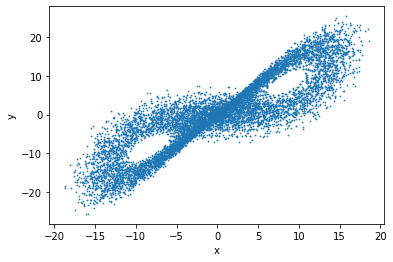

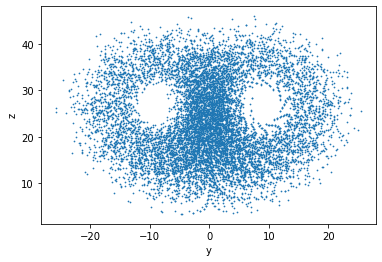

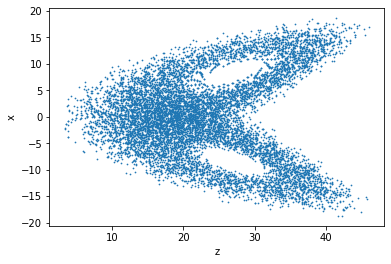

In [79]:
#plot the phase plane
#xy plane
plt.figure()
plt.scatter(x,y,s=0.5)
plt.xlabel('x')
plt.ylabel('y')

#yz plane
plt.figure()
plt.scatter(y,z,s=0.5)
plt.xlabel('y')
plt.ylabel('z')

#zx plane
plt.figure()
plt.scatter(z,x,s=0.5)
plt.xlabel('z')
plt.ylabel('x')

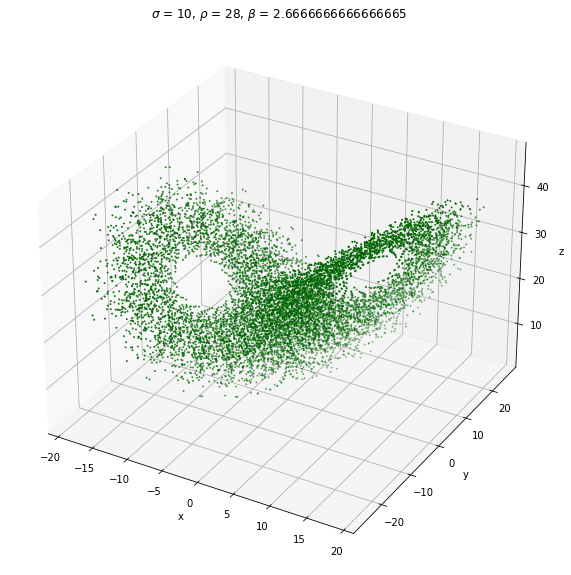

In [80]:
#### Plotting 3D plot: create an axis 3D object
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')   
ax.scatter(x,y,z,color='darkgreen',s=1) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title(r'$\sigma$ = '+str(sigma)+r', $\rho$ = '+str(rho)+r', $\beta$ = '+str(beta))
plt.show()
#plt.savefig('attractor_3D.jpg')

#### 3. Plot time series of the x variable (x vs t)

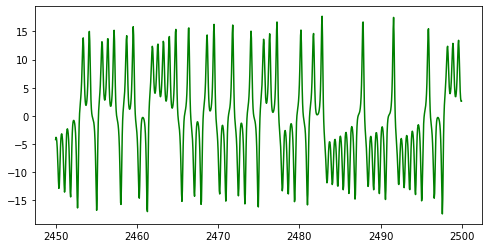

In [82]:
#### Plot time series
##write your code here to plot x vs t
plt.figure().set_size_inches(8,4)
plt.plot(t[-1000:],x[-1000:],color='g',label='x')

### SICness: Sensitivity to Initial conditions

In chaotic regime, even a slight difference in initial conditions can cause large variations in long-term. Let's see what happens when two trajectories start with the difference of only 0.0001

In [83]:
#get the new time series as x1 and x2
x1,y1,z1,t = rk4(x0,y0,z0,iterations,time_step)
x2,y2,z2,t = rk4(x0+0.00001,y0,z0,iterations,time_step)

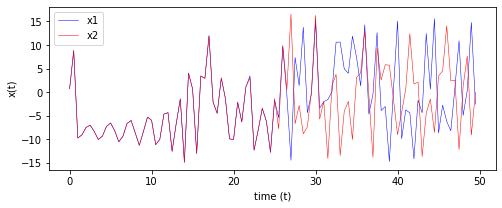

In [86]:
plt.figure().set_size_inches(8,3)
#note that we are zooming in 
#on some part of the time series here
#hence the limits
plt.plot(t[:1000:10],x1[:1000:10],color='b',label='x1',linewidth=0.5)
plt.plot(t[:1000:10],x2[:1000:10],color='r',label='x2',linewidth=0.5)
plt.xlabel('time (t)')
plt.ylabel('x(t)')
plt.legend()

As evident from the above figure, a slight difference in initial conditions can increase exponentially over time, and the final trajectories may look nothing alike. You can play around with the initial difference and see for yourself!